In [145]:
from dotenv import dotenv_values
import dotenv
import pathlib
import os

from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma, Weaviate, Pinecone
from langchain.docstore.document import Document
from langchain.prompts import PromptTemplate
from langchain.indexes.vectorstore import VectorstoreIndexCreator
from langchain.document_loaders import PyPDFLoader, PyPDFDirectoryLoader

import pinecone

dotenv.load_dotenv(".env")
config = dotenv_values(".env")
OPENAI_KEY = config["OPENAI_API_KEY"]
# WEVIATE_URL=config['WEAVIATE_URL']

In [36]:
# llm = OpenAI(openai_api_key=OPENAI_KEY, model='gpt-3.5-turbo')
# print(llm.predict("I am a business in the tech industry planning to open a branch in India. What are the relavant sustainability regulations I should be aware of?"))

In [159]:

# llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model='gpt-3.5-turbo')
llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model='gpt-4')

In [160]:
print(llm.predict("I am a business in the tech industry planning to open a branch in Singapore. What are the relavant sustainability regulations I should be aware of?"))

1. Environmental Impact Assessment (EIA): The Environmental Protection and Management Act (EPMA) in Singapore necessitates the need for an Environmental Impact Assessment (EIA) for certain types of projects. Businesses involved in large-scale development or industrial projects may need to conduct an EIA to assess their potential environmental impact.

2. Pollution Control: The EPMA also governs air and water pollution in Singapore. Businesses must comply with air emission and water discharge standards and may need to install pollution control equipment.

3. Energy Efficiency: The Energy Conservation Act mandates large energy users in the industrial sector to appoint an energy manager, monitor and report energy use and greenhouse gas emissions, and submit energy efficiency improvement plans.

4. Hazardous Substances: The EPMA requires businesses that use hazardous substances to obtain a license and comply with storage and handling regulations. 

5. Waste Management: The Waste Management

In [140]:
print(llm.predict('what are some actionable tasks i can do for my business related to sustainability regulations in the USA?'))

1. Understanding Regulations: Begin by familiarizing yourself with current sustainability regulations in the USA. These may include regulations on emissions, waste disposal, energy use, etc. 

2. Compliance Audit: Conduct a compliance audit to identify areas where your business may not be meeting sustainability regulations. This will help you prioritize what changes need to be made.

3. Implement Green Practices: Take steps to reduce your business's environmental impact. This could include recycling, conserving energy, using greener materials, etc.

4. Train Employees: Ensure your employees understand sustainability regulations and how they impact their roles. Train them on best practices for sustainability.

5. Develop a Sustainability Plan: Create a long-term plan to improve your business's sustainability. This could include setting goals for reducing waste, improving energy efficiency, etc.

6. Monitor Changes: Keep up-to-date with any changes in sustainability regulations. This wil

In [12]:
print(llm.predict("what are india's water pollution rules?"))

India has several regulations and laws in place to address water pollution. Some of the key rules and acts related to water pollution in India include:

1. Water (Prevention and Control of Pollution) Act, 1974: This act provides for the prevention and control of water pollution by establishing central and state pollution control boards. It outlines the powers and functions of these boards and sets guidelines for the prevention, control, and abatement of water pollution.

2. Environment (Protection) Act, 1986: This act empowers the central government to take necessary measures for protecting and improving the quality of the environment, including water resources. It provides for the regulation of discharge of pollutants into water bodies and sets standards for water quality.

3. Municipal Solid Wastes (Management and Handling) Rules, 2000: These rules focus on the management and handling of solid wastes to prevent their disposal into water bodies, which can cause pollution.

4. Biologic

# Parse pdfs

In [22]:
# data_folder = pathlib.Path('./assets/india')
# document_paths = [p for p in data_folder.iterdir() if p.is_file()]


In [63]:
# pages_all = []
# for p in document_paths:
#     loader = PyPDFLoader(p.__str__())
#     pages = loader.load_and_split()
#     pages_all.extend(pages)

In [188]:
loader = PyPDFDirectoryLoader('./assets/singapore/')
docs = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20))
# docs = loader.load_and_split()

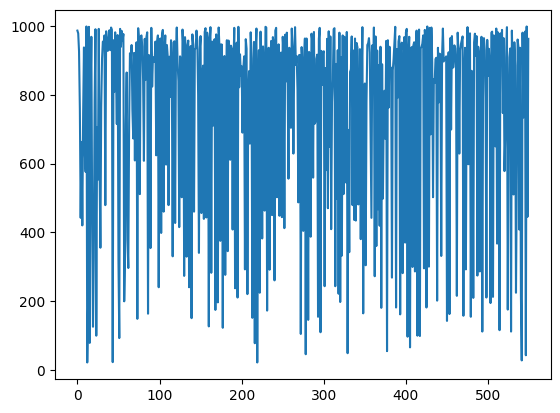

In [189]:
import matplotlib.pyplot as plt
plt.plot([len(p.page_content) for p in docs])

In [190]:
embeddings_model = OpenAIEmbeddings()

In [191]:
pinecone.init(
    api_key=os.getenv("PINECONE_API_KEY"),  # find at app.pinecone.io
    environment=os.getenv("PINECONE_ENV"),  # next to api key in console
)
index_name = "db-all"

INDIA_NAMESPACE ='india'
USA_NAMESPACE ='usa'
SG_NAMESPACE ='singapore'

# First, check if our index already exists. If it doesn't, we create it
if index_name not in pinecone.list_indexes():
    # we create a new index
    # dimension via openai embedding spec
    pinecone.create_index(name=index_name, metric="cosine", dimension=1536)


/Users/rohan/miniconda3/envs/hackathon/lib/python3.11/site-packages/pinecone/core/client/rest.py:45: DeprecationWarning: HTTPResponse.getheader() is deprecated and will be removed in urllib3 v2.1.0. Instead use HTTPResponse.headers.get(name, default).
  return self.urllib3_response.getheader(name, default)


In [121]:
# pinecone.Index(index_name).delete(delete_all=True)

{}

In [192]:
# db = Weaviate.from_documents(docs, embeddings_model, by_text=False)
db = Pinecone.from_documents(docs, embeddings_model, index_name=index_name, namespace=SG_NAMESPACE)

/Users/rohan/miniconda3/envs/hackathon/lib/python3.11/site-packages/pinecone/core/client/rest.py:45: DeprecationWarning: HTTPResponse.getheader() is deprecated and will be removed in urllib3 v2.1.0. Instead use HTTPResponse.headers.get(name, default).
  return self.urllib3_response.getheader(name, default)


In [193]:
query = "What does corporate social responsibility require me to do"
docs = db.similarity_search(query, namespace=SG_NAMESPACE)

/Users/rohan/miniconda3/envs/hackathon/lib/python3.11/site-packages/pinecone/core/client/rest.py:45: DeprecationWarning: HTTPResponse.getheader() is deprecated and will be removed in urllib3 v2.1.0. Instead use HTTPResponse.headers.get(name, default).
  return self.urllib3_response.getheader(name, default)


In [194]:
len(docs), docs[0].metadata['source']

(4, 'assets/singapore/Sustainability Reporting - Singapore Exchange (SGX).pdf')

In [195]:
print
(docs[0].page_content)

'The TCFD’s interna\x00onally recognised recommenda\x00ons will guide issuers in providing consistent and decision-useful informa\x00on\nfor market par\x00cipants. This is a ﬁrst step to be\x00er prepare issuers for repor\x00ng against an\x00cipated global baseline sustainability\nrepor\x00ng standards to be developed by the Interna\x00onal Sustainability Standards Board, which build on exis\x00ng work of leading\nsustainability repor\x00ng organisa\x00ons, including the TCFD.\nComponents of a Sustainability Report\nExpand All \uf107\nThe sustainability repor\x00ng requirement \uf107\nMaterial ESG factors \uf107\nClimate-related disclosures \uf107\nPolicies and targets \uf107\nSustainabilityrepor\x00ngframework \uf107We use cookies to ensure that we give you the best experience on our website. If you click “Accept Cookies”, or con\x00nue without\nchanging your se\x00ng s, you consent to their use. You can change your se\x00ngs at any \x00me. To learn more about how we collect\nand use 

In [185]:
len(docs[0].page_content)

976

In [148]:
prompt_template = """You are a large language model whose expertise is answering user queries about sustainability and sustainability policies in {country}. You want to help the user understand regulations and implement it in their business.
You are given a query and a series of text embeddings from a regulatory documents in order of their cosine similarity to the query.
You must return a detailed answer of the query taking into account information from the embeddings. 
    
Given the question: {user_query}
    
and the following embeddings as data: 

1. {emb1}
2. {emb2}
3. {emb3}
4. {emb4}


Return a detailed answer."""
prompt = PromptTemplate(
    input_variables=['country','user_query','emb1','emb2','emb3','emb4'],
    template=prompt_template
)

In [158]:
# llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model="gpt-3.5-turbo")
llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model="gpt-4")
chain = LLMChain(llm=llm, prompt=prompt)

# query = "What do policies in india say about energy consumption for businesses?"
query = "I have a sand transportation business. What are some measures I can take to be more sustainable?"
country = "india"
# fetch relavant embeddings
docs = db.similarity_search(query)
emb_texts = [d.page_content for d in docs]
emb_meta = [d.metadata for d in docs]

result = chain.run(
    country=country,
    user_query=query,
    emb1=emb_texts[0],
    emb2=emb_texts[1],
    emb3=emb_texts[2],
    emb4=emb_texts[3],
)

source_strs = [pathlib.Path(m['source']).stem for m in emb_meta]
source_str_add = '\n'.join([f"{i+1}. {s}, page {int(emb_meta[i]['page'])}" for i,s in enumerate(source_strs)])
print(result+'\n\n\n'+source_str_add)

/Users/rohan/miniconda3/envs/hackathon/lib/python3.11/site-packages/pinecone/core/client/rest.py:45: DeprecationWarning: HTTPResponse.getheader() is deprecated and will be removed in urllib3 v2.1.0. Instead use HTTPResponse.headers.get(name, default).
  return self.urllib3_response.getheader(name, default)


Based on the information from the provided embeddings, there are several measures you can take to make your sand transportation business more sustainable:

1. **Understand Your Impact**: The first step to becoming more sustainable is to understand all material sustainability issues across your business life cycle and value chain. This includes understanding the environmental and social impact of your business at all stages, from establishment to closure. Special care should be taken where these impacts occur in eco-sensitive areas.

2. **Develop Sustainable Strategies**: Develop strategies for sustainable and efficient use of natural resources, including your vehicles and other materials. Consider the expectations and concerns of all stakeholders, such as your employees, customers, and local communities, in your strategy development.

3. **Measure Your Performance**: Define measurable key performance indicators (KPIs) and targets to monitor your performance on environmental aspects suc

In [157]:
emb_meta

[{'page': 99.0,
  'source': 'assets/india/Corporate Social Responsibility (CSR) Rules under the Companies Act, 2013.pdf'},
 {'page': 104.0,
  'source': 'assets/india/Corporate Social Responsibility (CSR) Rules under the Companies Act, 2013.pdf'},
 {'page': 35.0, 'source': 'assets/india/Solid_Waste_Management_Rules.pdf'},
 {'page': 104.0,
  'source': 'assets/india/Corporate Social Responsibility (CSR) Rules under the Companies Act, 2013.pdf'}]